In [1]:
import argparse
import os
import torch
import torch.nn as nn
import matplotlib.pyplot
from sklearn import tree

import numpy as np
import gym
import time
import yaml

import graphviz
import pydotplus
from IPython.display import Image

from DeepLearning_Models.utils.general import join
from Explanations_Models.LIME_Gen import LIME
from DeepLearning_Models.ActorCritic.policy_gradient import PolicyGradient
yaml.add_constructor("!join", join)
parser = argparse.ArgumentParser()

In [2]:
config_file = open("config_explanations/{}.yml".format("Acrobot_UniformPolicy_All"))
config = yaml.load(config_file, Loader = yaml.FullLoader)

In [3]:

def weight_dict_corrector(loaded_state_dict):
    new_state_dict = {}
    for key, value in loaded_state_dict.items():
        new_key = key.replace("network.", "")  # Remove the 'network.' prefix
        new_state_dict[new_key] = value
    return new_state_dict

env = gym.make(config["env"]["env_name"], render_mode="rgb_array")
seed = 69420
model = PolicyGradient(env, config, 69420)
print(model.network.d)
model.network.load_state_dict(weight_dict_corrector(torch.load(config["output"]["actor_output"].format(seed))))
model.baseline_network.load_state_dict(torch.load(config["output"]["critic_output"].format(seed)))

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [4]:
DT.fit(torch.tensor([[4],[1],[2],[3],[5],[5],[1],[2]]), torch.tensor([1,1,1,0,0,2,2,0]))

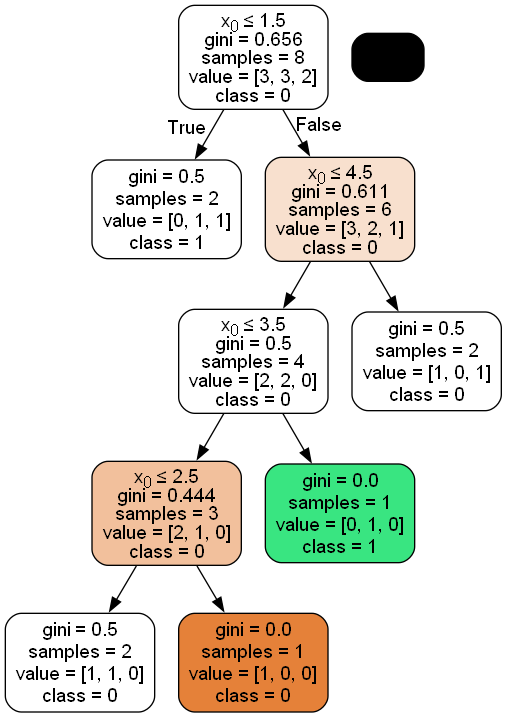

In [5]:
Image(pydotplus.graph_from_dot_data(tree.export_graphviz(DT.tree,out_file=None,
                           class_names=['0','1','2'],
                           filled=True, rounded=True,  
                           special_characters=True)).create_png())

In [6]:
DT.evaluate(torch.tensor([[4],[1],[2],[3],[5],[5],[1],[2]]), torch.tensor([1,1,1,0,0,2,2,0]))

[0.625, 0.625, 0.625, 0.625]